# Práctica 3: Regresión logística multi-clase y redes neuronales
---
### Autores:
Raúl Murillo Montero - 5º Doble Grado en Ingeniería Informática - Matemáticas   
Miguel Sierra Esteso - 4º Grado en Ingeniería Informática

---
**Fecha de entrega:** 8 de noviembre de 2018, 16.00h

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.optimize as opt
#from sklearn.preprocessing import PolynomialFeatures

## 1. Regresión logística multi-clase
El objetivo de esta primera parte de la práctica es aplicar regresión logística multi-clase al
reconocimiento de imágenes que representan números escritos a mano.

### 1.1. Visualización de los datos
El fichero `ex3data1.mat` contiene 5000 ejemplos de entrenamiento en el formato nativo
para matrices de Octave/Matlab.

In [2]:
data = loadmat ('ex3data1.mat')
# se pueden consultar las claves con data.keys()
y = data['y']
X = data ['X']
# almacena los datos leídos en X, y

<IPython.core.display.Javascript object>


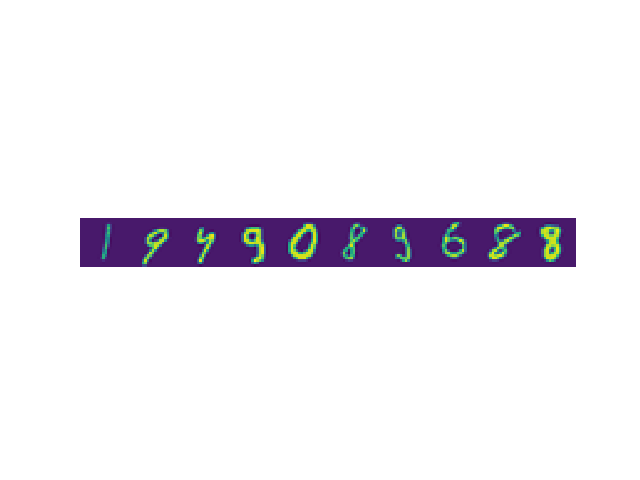

(-0.5, 199.5, 19.5, -0.5)

In [13]:
# Selecciona aleatoriamente 10 ejemplos y los pinta
sample = np.random.choice(X.shape[0], 10)
plt.imshow(X[sample, : ].reshape(-1, 20).T)
plt.axis('off')

### 1.2. Vectorización de la regresión logística
Para aplicar regresión logística al reconocimiento de dígitos tendrás que entrenar 10 clasificadores
logísticos diferentes, uno para cada posible valor del dígito a reconocer.

In [4]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [5]:
def coste(theta, x, y):
    return -(np.dot(np.transpose(np.log(sigmoid(np.dot(x, theta)))), y) + np.dot(np.transpose(np.log(1 - sigmoid(np.dot(x, theta)))), (1 - y)))/len(y)

#### Vectorización del gradiente

In [19]:
def gradiente(theta, x, y):
    print('From gradient')
    print('dimensión de x', end='')
    print(np.shape(x))
    print('dimensión de theta', end='')
    print(np.shape(theta))
    print('dimensión del sigmoide', end='')
    print(np.shape(sigmoid(np.dot(x, theta))))
    grad = ((np.transpose(x)).dot(np.c_[sigmoid(np.dot(x, theta)) - y]))/len(y)
    print('dimensión del gradiente', end='')
    print(np.shape(grad))
    return ((np.transpose(x)).dot(sigmoid(np.dot(x, theta)) - y))/len(y)

#### Vectorización de la versión regularizada

In [7]:
def coste_reg(theta, x, y, l):
    return (coste(theta, x, y) + l/(2*len(y))*(np.square(theta[1:])).sum())

In [8]:
def gradiente_reg(theta, x, y, l):
    # para no incluir el término de regularización en el cálculo del gradiente respecto de theta_0
    aux = np.hstack(([0],theta[1:]))
    print(np.shape(theta))
    print(np.shape(x))
    return (gradiente(theta, x, y) + l*aux/len(y))

### 1.3 Clasificación de uno frente a todos

In [9]:
y_9 = (y==9)*1
y_9

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [25]:
def oneVsAll (X, y, num_etiquetas, reg):
    """
    oneVsAll entrena varios clasificadores por regresión logística con término
    de regularización 'reg' y devuelve el resultado en una matriz, donde
    la fila i-ésima corresponde al clasificador de la etiqueta i-ésima
    """
    # Matriz de parámetros
    T = np.zeros([num_etiquetas, len(X[0])+1])
    X_aux = np.hstack([np.ones((len(y), 1)), X])
    init_t = np.zeros(len(X[0])+1) # ERROR de broadcasting
    
    for k in range (0, 10):
        labels = (y==k+1)*1
        result = opt.fmin_tnc(func=coste_reg, x0=init_t, fprime=gradiente_reg, args=(X_aux, labels, reg))
        T[k] = result[0]
    
    return T

In [24]:
T = np.zeros([10, len(X[0])+1])
np.shape(T[0])

(401,)

In [44]:
R = np.zeros(10*5000)
R = R.reshape(y.shape)

ValueError: cannot reshape array of size 50000 into shape (5000,1)

In [26]:
#X_aux = np.hstack([np.ones((len(y), 1)), X])
oneVsAll(X, y, 10, 0.1)

(401,)
(5000, 401)
From gradient
dimensión de x(5000, 401)
dimensión de theta(401,)
dimensión del sigmoide(5000,)
dimensión del gradiente(401, 5000)


ValueError: operands could not be broadcast together with shapes (401,5000) (401,) 

In [33]:
np.shape(np.r_[[0]*8])

(8,)

In [34]:
np.shape(np.zeros([10, len(X[0])+1])[0])

(401,)